Join the data from Part 1 with the data from Part 2 to create a new dataframe.

Import Libraries

In [2]:
#Getting necessary imports
import pandas as pd

Getting part 1 data, **citybikes_vancouver.csv**

In [3]:
#load city_bikes_vancouver.csv
cb_vancouver = pd.read_csv('../data/citybikes_vancouver.csv')

Getting part 2 data

1. Foursquare
2. Yelp

### 1. Foursquare

Load the required csv files
1. Citybike Foursquare Vancouver: `cb_fsq_vancouver.csv`
2. Citybike Foursquare Tips: `cb_fsq_tips_vancouver.csv`

In [4]:
# Foursquare
#load cb_fsq_vancouver.csv
cb_fsq_vancouver = pd.read_csv('../data/cb_fsq_vancouver.csv')
#load cb_fsq_vancouver_tips
cb_fsq_vancouver_tips = pd.read_csv('../data/cb_fsq_tips_vancouver.csv')

Getting the number of tips recieved on a particular POI

In [5]:
#get the count of fsq_id in tips
tips_count = cb_fsq_vancouver_tips.groupby('fsq_id').size().reset_index(name='review_count')

#merge cb_fsq_vancouver and tips_count
cb_fsq_vancouver = pd.merge(cb_fsq_vancouver, tips_count, on='fsq_id', how='left')

Rounding Latitude and Longitude data to 3 decimal places for better comprehension<br/>
`result: 49.282, -123.120`

In [ ]:
#round lat and long to 3 decimal places
cb_fsq_vancouver['lat'] = cb_fsq_vancouver['lat'].round(3)
cb_fsq_vancouver['long'] = cb_fsq_vancouver['long'].round(3)

Acquiring postal codes in a format of A1A1A1<br/>
`result: V5Z3Y6`

In [ ]:
#get postal codes from address
cb_fsq_vancouver['postal_code'] = cb_fsq_vancouver['address'].str.split(',').str[-1].str.strip()
#remove 'Vancouver BC' from address
cb_fsq_vancouver['postal_code'] = cb_fsq_vancouver['postal_code'].str.replace('Vancouver BC', '')
#remove space
cb_fsq_vancouver['postal_code'] = cb_fsq_vancouver['postal_code'].str.replace(' ','')

Here trying to get the number of street in the address<br/>
Example: 4558 Prince Street<br/>
`result: 4558`

In [ ]:
# from address extract number
cb_fsq_vancouver['number'] = cb_fsq_vancouver['address'].str.split(' ').str[0]

# remove string from number and save only integers
cb_fsq_vancouver['number'] = cb_fsq_vancouver['number'].str.replace('[^0-9]','')

### 2. Yelp

Load required csv files:
`cb_yelp_vancouver.csv`

In [9]:
#Yelp
#load cb_yelp_vancouver.csv
cb_yelp_vancouver = pd.read_csv('../data/cb_yelp_vancouver.csv')

Rounding Longitude and Latitude to 3 decimal places
<br/>
`example: 49.264, -123.113`

In [ ]:
#round the latitude and longitude to 3 decimal places
cb_yelp_vancouver['lat'] = cb_yelp_vancouver['lat'].round(3)
cb_yelp_vancouver['long'] = cb_yelp_vancouver['long'].round(3)
#drop square brackets and single quotes from the address column
cb_yelp_vancouver['address'] = cb_yelp_vancouver['address'].str.replace('[','').str.replace(']','').str.replace("'",'')

Acquiring postal codes in a format of A1A1A1<br/>
`result: V5Z3Y6`

In [ ]:
# From address column get the postal code
postal_code = cb_yelp_vancouver['address'].str.split(',').str[-2].str.strip()
# Remove 'BC' from postal_code column
postal_code = postal_code.str.replace('BC','')
# Remove space from postal_code column
postal_code = postal_code.str.replace(' ','')

cb_yelp_vancouver['postal_code'] = postal_code

Here trying to get the number of street in the address<br/>
Example: 4558 Prince Street<br/>
`result: 4558`

In [ ]:
# from address extract number
cb_yelp_vancouver['number'] = cb_yelp_vancouver['address'].str.split(' ').str[0]

# remove string from number and save only integers
cb_yelp_vancouver['number'] = cb_fsq_vancouver['number'].str.replace('[^0-9]','')

#if there is a '-' in value then use only second value
if '-' in cb_yelp_vancouver['number']:
    cb_yelp_vancouver['number'] = cb_yelp_vancouver['number'].str.split('-').str[1]

Joining `Foursquare` and `Yelp` into single dataframe using columns mentioned below:
1. cb_id
2. Street number
3. Postal code

In [ ]:
# join cb_fsq_vancouver and cb_yelp_vancouver through cb_id, number, postal_code, lat, long
cb_fsq_yelp_vancouver = pd.merge(cb_fsq_vancouver, cb_yelp_vancouver, on=['cb_id', 'number', 'postal_code'], how='outer')

#fill Nan values with 'Not Available'
cb_fsq_yelp_vancouver = cb_fsq_yelp_vancouver.fillna('unavailable')

In [ ]:
# drop columns that are not required
cb_fsq_yelp_vancouver = cb_fsq_yelp_vancouver.drop(['lat_x', 'long_x', 'address_x', 'number'], axis=1)

Merging `Yelp,Foursquare` dataframe with `Citybike` dataframe

In [ ]:
#join cb_fsq_yelp_vancouver and cb_vancouver through cb_id
main_df = pd.merge(cb_fsq_yelp_vancouver, cb_vancouver, on='cb_id', how='outer')

Cleaning the data by removing less significant columns and rows

In [ ]:
#drop all rows where anything is unavailable
cb_fsq_yelp_vancouver['review_count_x'] = pd.to_numeric(cb_fsq_yelp_vancouver['review_count_x'], errors='coerce')
cb_fsq_yelp_vancouver['review_count_y'] = pd.to_numeric(cb_fsq_yelp_vancouver['review_count_y'], errors='coerce')
cb_fsq_yelp_vancouver['rating'] = pd.to_numeric(cb_fsq_yelp_vancouver['rating'], errors='coerce')

condensed_df = cb_fsq_yelp_vancouver.groupby('cb_id').agg(
    avg_fsq_review=('review_count_x', 'mean'),
    avg_yelp_review=('review_count_y', 'mean'),
    avg_yelp_rating=('rating', 'mean')
).reset_index()

In [28]:
# merge condensed_df and cb_vancouver
main_df = pd.merge(condensed_df, cb_vancouver, on='cb_id', how='outer')

main_df.head()

,cb_id,avg_fsq_review,avg_yelp_review,avg_yelp_rating,name,latitude,longitude,free_bikes
0,cb_0,19.8,297.85,4.025,10th & Cambie,49.262487,-123.114397,21
1,cb_1,17.4,781.20,4.225,Yaletown-Roundhouse Station,49.274566,-123.121817,9
2,cb_10,25.4,893.70,4.175,Pender & Burrard,49.287097,-123.118551,13
3,cb_100,21.5,208.40,4.025,Pine & 14th,49.258864,-123.143530,0
4,cb_101,24.0,287.00,4.075,York & Yew,49.271741,-123.155421,5


Saving the merged single dataframe into csv format

In [29]:
#save to csv cb_avg_ratings.csv
main_df.to_csv('../data/cb_avg_ratings.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [69]:
# using matplotlib to plot the data
import matplotlib.pyplot as plt

In [ ]:
#load main_df
main_df = pd.read_csv('../data/cb_avg_ratings.csv')

#plot a bar chart to show difference between yelp and foursquare reviews
#count fsq_id and store it in a variable as integer where fsq_id is not unavailable
y1 = main_df[main_df['fsq_id'] != 'unavailable'].groupby('fsq_id').size().reset_index(name='count')
#sum y1 and store it in a self
y1 = y1['count'].sum()

#count ratings and store it in a variable where ratings is not unavailable
y2 = main_df[main_df['rating'] != 'unavailable'].groupby('rating').size().reset_index(name='count')
y2 = y2['count'].sum()

#x is total size of main_df
x = main_df.groupby('cb_id').size().reset_index(name='count')
x = x['count'].sum()

y3 = y1+y2-x


Below bar chart reveals number of reviews from Foursquare and Yelp

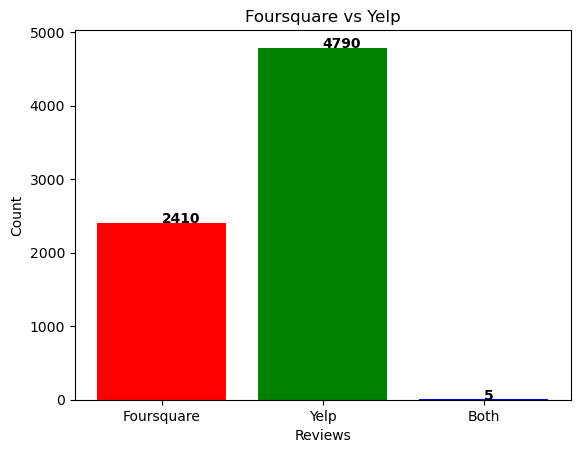

In [ ]:

#plot the bar chart y1 as foursquare, y2 as yelp, y3 as Both
plt.bar(['Foursquare', 'Yelp', 'Both'], [y1, y2, y3], color=['red', 'green', 'blue'])
plt.title('Foursquare vs Yelp')
plt.xlabel('Reviews')
plt.ylabel('Count')
#show no of reviews for foursquare, yelp and both
for i, v in enumerate([y1, y2, y3]):
    plt.text(i, v, str(v), color='black', fontweight='bold')
    
plt.show()

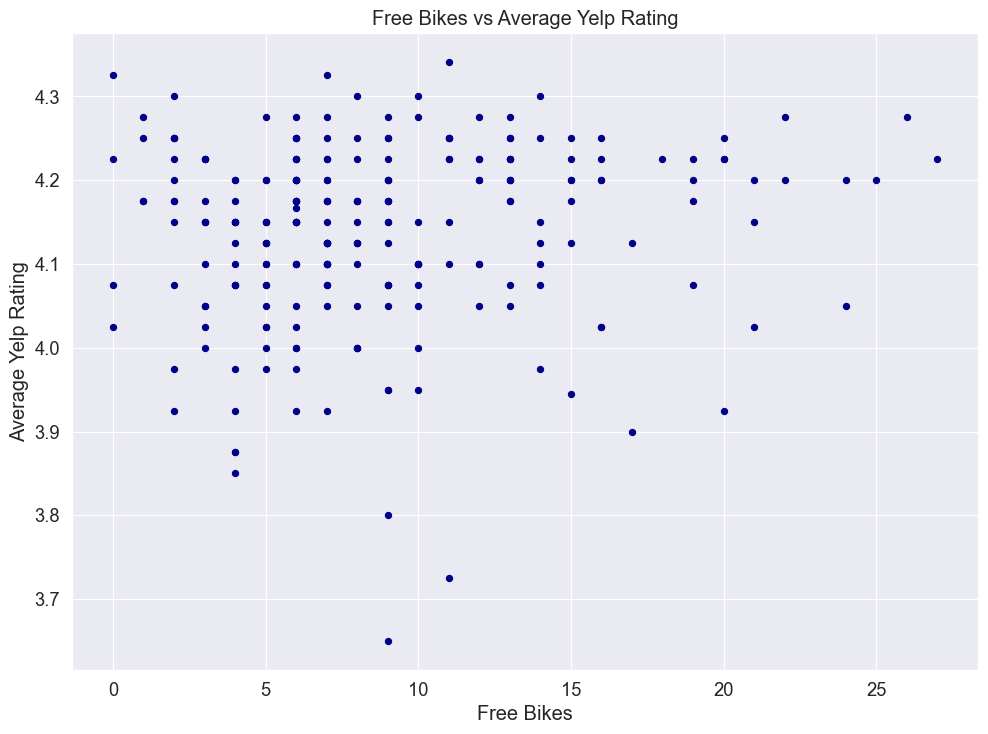

In [61]:
#bar chart for free_bikes and avg_yelp_ratings
plot = main_df.plot.scatter(x='free_bikes', y='avg_yelp_rating', c='DarkBlue')
plt.title('Free Bikes vs Average Yelp Rating')
plt.xlabel('Free Bikes')
plt.ylabel('Average Yelp Rating')
plt.show()

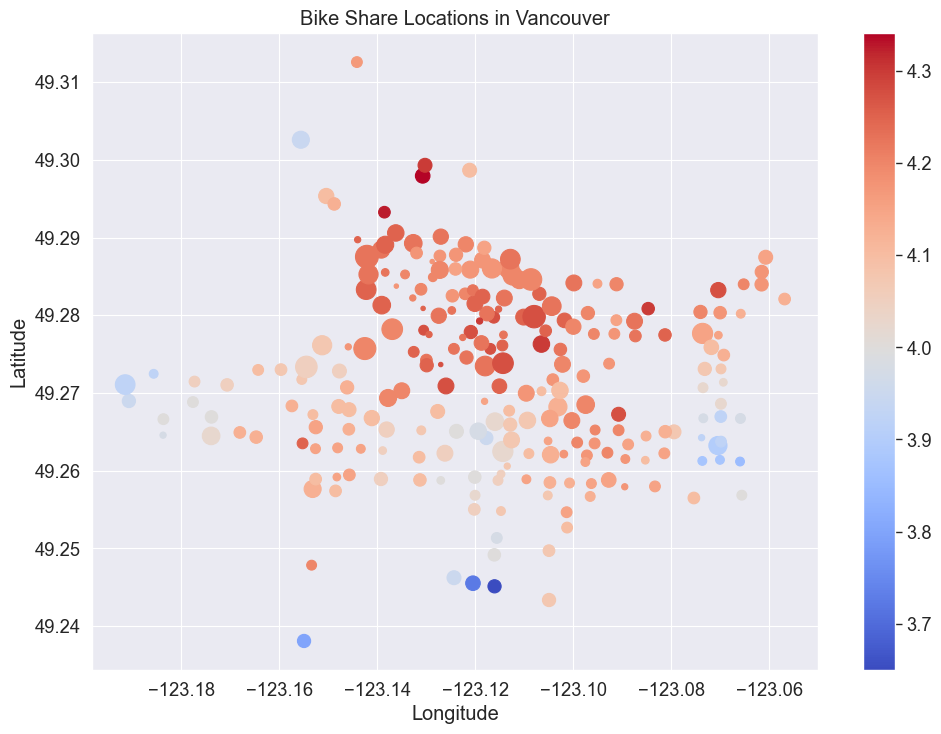

In [66]:
# Define the x and y coordinates of the markers
x = cb_avg_ratings['longitude']
y = cb_avg_ratings['latitude']

# Define the marker size and color
marker_size = cb_avg_ratings['free_bikes']
marker_color = cb_avg_ratings['avg_yelp_rating']

# Create the scatter plot
plt.scatter(x, y, s=marker_size*10, c=marker_color, cmap='coolwarm')
plt.colorbar()

# Set the axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bike Share Locations in Vancouver')

# Display the plot
plt.show()

# plot ratings more than 4.5 and bikes more than 10
plot = main_df[main_df['avg_yelp_rating'] > 4.0].plot.scatter(x='free_bikes', y='avg_yelp_rating', c='DarkBlue')
plt.title('Free Bikes vs Average Yelp Rating')
plt.xlabel('Free Bikes')
plt.ylabel('Average Yelp Rating')
plt.show()

Above bar chart reveals average ratings on POIs and free bikes near them.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [22]:
import sqlite3

In [23]:
# create a sqlite3 database named 'vancouver.db'
conn = sqlite3.connect('../data/vancouver.db')
conn.close()

Loading csv files
1. Citybike Vancouver: `citybikes_vancouver.csv`
2. Citybike Foursquare Vancouver: `cb_fsq_vancouver.csv`
3. Citybike Foursquare Tips: `cb_fsq_tips_vancouver.csv`
4. Citybike Yelp Vancouver: `cb_yelp_vancouver.csv`
5. Citybike average ratings: `cb_avg_ratings.csv`

In [45]:
# laod cb_vancouver.csv
cb_vancouver = pd.read_csv('../data/citybikes_vancouver.csv')
# load cb_fsq_vancouver.csv
cb_fsq_vancouver = pd.read_csv('../data/cb_fsq_vancouver.csv')
# load cb_fsq_tips_vancouver.csv
cb_fsq_tips_vancouver = pd.read_csv('../data/cb_fsq_tips_vancouver.csv')
# load cb_yelp_vancouver.csv
cb_yelp_vancouver = pd.read_csv('../data/cb_yelp_vancouver.csv')
# load cb_avg_ratings.csv
cb_avg_ratings = pd.read_csv('../data/cb_avg_ratings.csv')

Creating table for citybikes_vancouver.csv
Here `primary key` is `cb_id`

In [27]:
# Connect to the database
conn = sqlite3.connect('database.db')

# Drop the table if it exists
conn.execute('DROP TABLE IF EXISTS cb_vancouver')

# Create the table
conn.execute('''CREATE TABLE cb_vancouver (
                    name TEXT,
                    latitude REAL,
                    longitude REAL,
                    free_bikes INTEGER,
                    cb_id TEXT PRIMARY KEY
                )''')

# Insert the data into the table
cb_vancouver.to_sql('cb_vancouver', conn, if_exists='append', index=False)

# Commit the changes and close the connection
conn.commit()
conn.close()

Creating table for citybikes `Foursquare` vancouver
FSQ_ID is `foreign key`

In [37]:
# Connect to the database
conn = sqlite3.connect('database.db')

# Drop the table if it already exists
conn.execute("DROP TABLE IF EXISTS cb_fsq_vancouver")

# Create the table
conn.execute('''CREATE TABLE cb_fsq_vancouver (
                    fsq_id TEXT,
                    station TEXT,
                    category TEXT,
                    name TEXT,
                    address TEXT,
                    lat REAL,
                    long REAL,
                    site TEXT,
                    cb_id TEXT,
                    FOREIGN KEY (fsq_id) REFERENCES cb_fsq_vancouver(fsq_id)
                )''')

# Insert the data from the DataFrame into the table
cb_fsq_vancouver.to_sql('cb_fsq_vancouver', conn, if_exists='append', index=False)

# Commit the changes and close the connection
conn.commit()
conn.close()

Creating table for citybikes `Foursquare` vancouver reviews (tips)<br/>
id is `primary key`<br/>
fsq_id is `foreign key`

In [36]:
# Connect to a SQLite database
conn = sqlite3.connect('database.db')

# Drop the table if it already exists
conn.execute('DROP TABLE IF EXISTS cb_fsq_vancouver_tips')

# Create a new table with the right datatypes
conn.execute('''CREATE TABLE cb_fsq_vancouver_tips (
                    id TEXT,
                    created_at TEXT,
                    text TEXT,
                    fsq_id TEXT,
                    PRIMARY KEY (id),
                    FOREIGN KEY (fsq_id) REFERENCES cb_fsq_vancouver(fsq_id)
                )''')

# Insert the DataFrame into the SQLite table
cb_fsq_tips_vancouver.to_sql('cb_fsq_vancouver_reviews', conn, if_exists='append', index=False)

# Commit the changes and close the connection
conn.commit()
conn.close()

Create a table cb_yelp_vancouver in database.db<br/>
cb_id is `foriegn key`

In [42]:
# Connect to the database
conn = sqlite3.connect('database.db')

# Drop the table if it already exists
conn.execute('DROP TABLE IF EXISTS cb_yelp_vancouver')

# Create the table
conn.execute('''CREATE TABLE cb_yelp_vancouver (
                    title TEXT,
                    name TEXT,
                    address TEXT,
                    lat REAL,
                    long REAL,
                    rating REAL,
                    review_count INTEGER,
                    site TEXT,
                    cb_id TEXT FORIEGN KEY
                )''')

# Insert the DataFrame into the SQLite table
cb_yelp_vancouver.to_sql('cb_yelp_vancouver', conn, if_exists='append', index=False)


# Commit the changes and close the connection
conn.commit()
conn.close()

Create a table cb_avg_ratings for Vancouver in database.db<br/>
cb_id is `primary key`

In [48]:
# Connect to database
conn = sqlite3.connect('database.db')

# Drop table if exists
conn.execute('DROP TABLE IF EXISTS cb_avg_ratings')

# Create the table
conn.execute('''CREATE TABLE cb_avg_ratings (
                    cb_id TEXT PRIMARY KEY,
                    avg_fsq_review REAL,
                    avg_yelp_review REAL,
                    avg_yelp_rating REAL,
                    name TEXT,
                    latitude REAL,
                    longitude REAL,
                    free_bikes INTEGER
                )''')

# Insert the DataFrame into the SQLite table
cb_avg_ratings.to_sql('cb_avg_ratings', conn, if_exists='append', index=False)

# Commit changes and close connection
conn.commit()
conn.close()

Look at the data before and after the join to validate your data.

Here are list of records where `free_bikes are more than 20` and `average rating is more than 4.0`

In [57]:
# Connect to the database
conn = sqlite3.connect('database.db')

# Create a cursor
cur = conn.cursor()

# Execute the query
cur.execute("SELECT cb_id, avg_fsq_review, avg_yelp_review, avg_yelp_rating, name FROM cb_avg_ratings WHERE free_bikes > 20 AND avg_yelp_rating >= 4.0")

# Fetch and print the results
results = cur.fetchall()
for row in results:
    print(row)

# Close the cursor and connection
cur.close()
conn.close()

('cb_0', 19.8, 297.85, 4.025, '10th & Cambie')
('cb_110', 16.666666666666668, 219.6, 4.15, 'Adanac & McLean')
('cb_13', 24.1, 905.4, 4.2, 'Cordova & Granville')
('cb_171', 31.22222222222222, 502.05, 4.2, 'Aquatic Centre')
('cb_214', 25.8, 559.05, 4.225, 'Davie & Beach')
('cb_27', 13.11111111111111, 899.35, 4.2, 'Cambie & Water')
('cb_28', 25.9, 902.45, 4.275, 'Keefer & Abbott')
('cb_31', 30.4, 788.0, 4.275, 'Marinaside & Cooperage')
('cb_44', 20.3, 319.65, 4.2, 'Vanier Park')
('cb_83', 25.7, 288.8, 4.05, 'Kitsilano Beach Park')
